<a href="https://colab.research.google.com/github/mchardians/PCVK_Matrikulasi_2024/blob/main/Praktikum_1_Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from math import log10, sqrt
import glob
from skimage.util import random_noise

 Gamma Correction Pada Citra 
-----------------------------
Masukkan nilai Gamma: 3


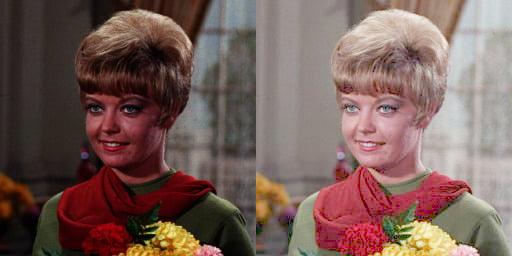

In [10]:
print(" Gamma Correction Pada Citra ")
print("-----------------------------")

try:
  gamma = int(input("Masukkan nilai Gamma: "))
except ValueError:
  print("Error, not a number")

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

image = cv.imread('Images/female.jpg')

gamma_corrected_image = gamma_correction(image, gamma)

final_frame = cv.hconcat([image, gamma_corrected_image])

cv2_imshow(final_frame)

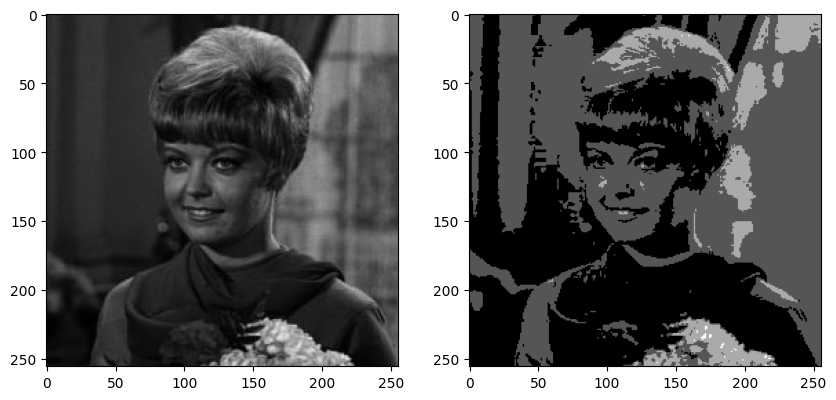

In [11]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('Images/female.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

depth_image = np.round(original / level) * level
depth_image = depth_image.astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
axes[1].imshow(cv.cvtColor(depth_image, cv.COLOR_BGR2RGB))

plt.show()

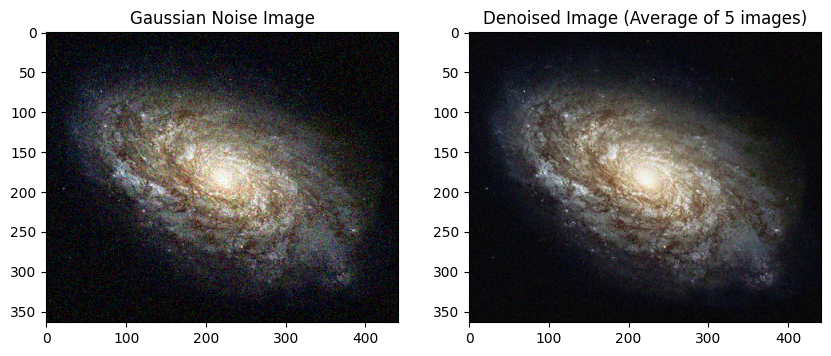

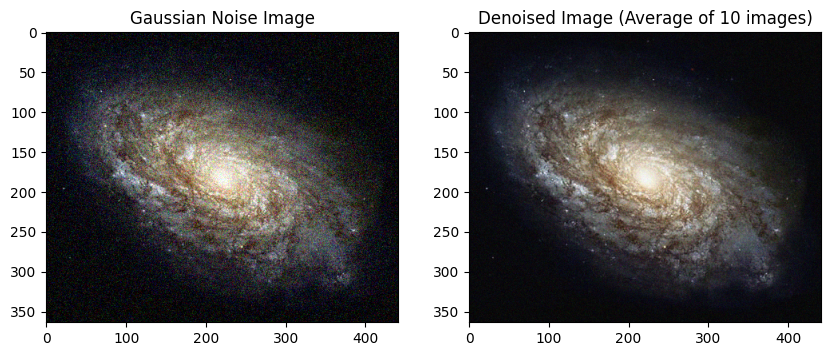

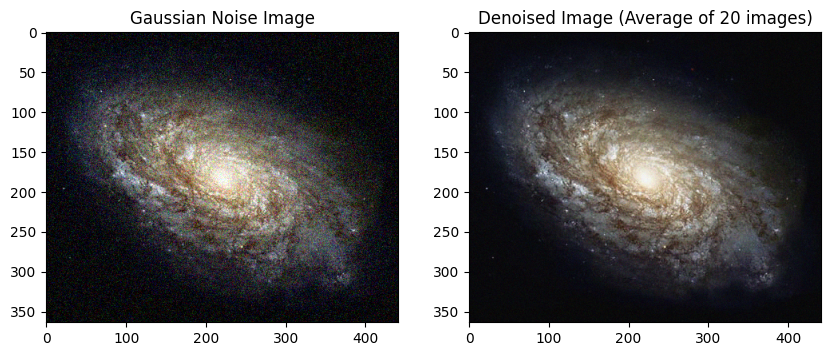

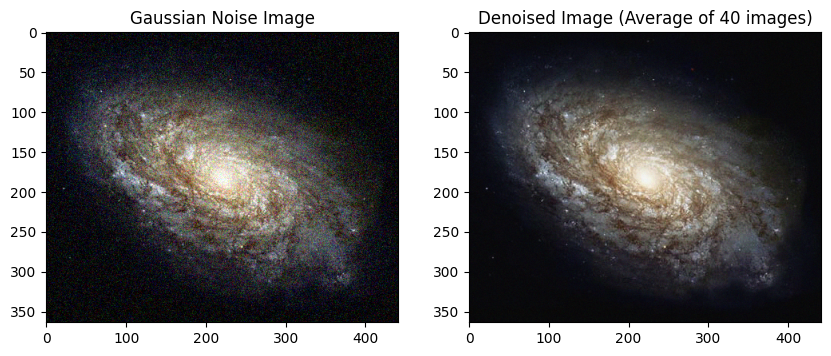

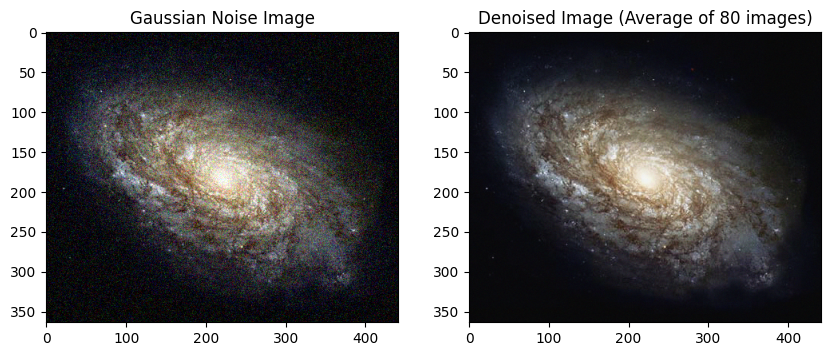

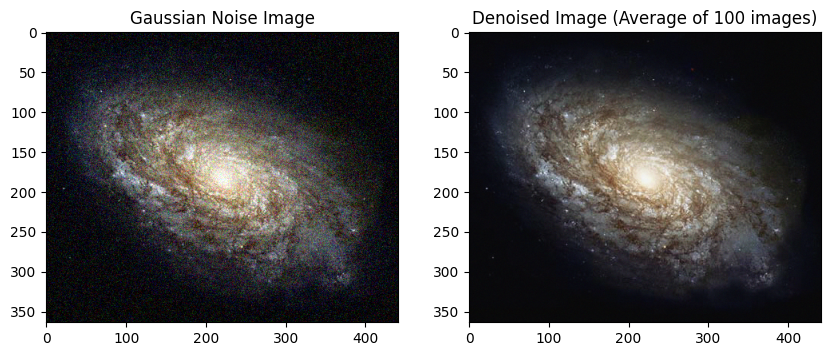

<Figure size 1000x500 with 0 Axes>

In [21]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

original = cv.imread('Images/galaxy.png')

num_noisy_images = 100
noisy_images = [add_gaussian_noise(original) for _ in range(num_noisy_images)]

num_images_list = [5, 10, 20, 40, 80, 100]
psnr_values = []

for num_images in num_images_list:
    avg_image = np.mean(noisy_images[:num_images], axis=0).astype(np.uint8)

    psnr = PSNR(original, avg_image)
    psnr_values.append(psnr)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(noisy_images[0], cv.COLOR_BGR2RGB))
    plt.title('Gaussian Noise Image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))
    plt.title(f'Denoised Image (Average of {num_images} images)')
    plt.show()

plt.figure(figsize=(10, 5))
plt.show()

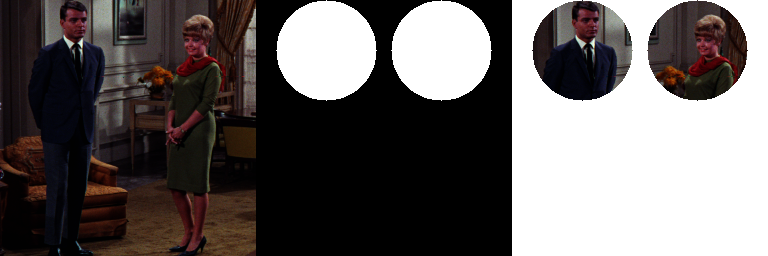

In [28]:
img = cv.imread('Images/Couple.bmp')

mask_layer = np.zeros(img.shape, dtype=img.dtype)

cv.circle(mask_layer, (70, 50), 50, (255, 255, 255), thickness=-1)
cv.circle(mask_layer, (185, 50), 50, (255, 255, 255), thickness=-1)

result_image = cv.bitwise_and(img, mask_layer)

result_image[(result_image == 0).all(axis=-1)] = [255, 255, 255]

output_image = cv.hconcat([img, mask_layer, result_image])

cv2_imshow(output_image)

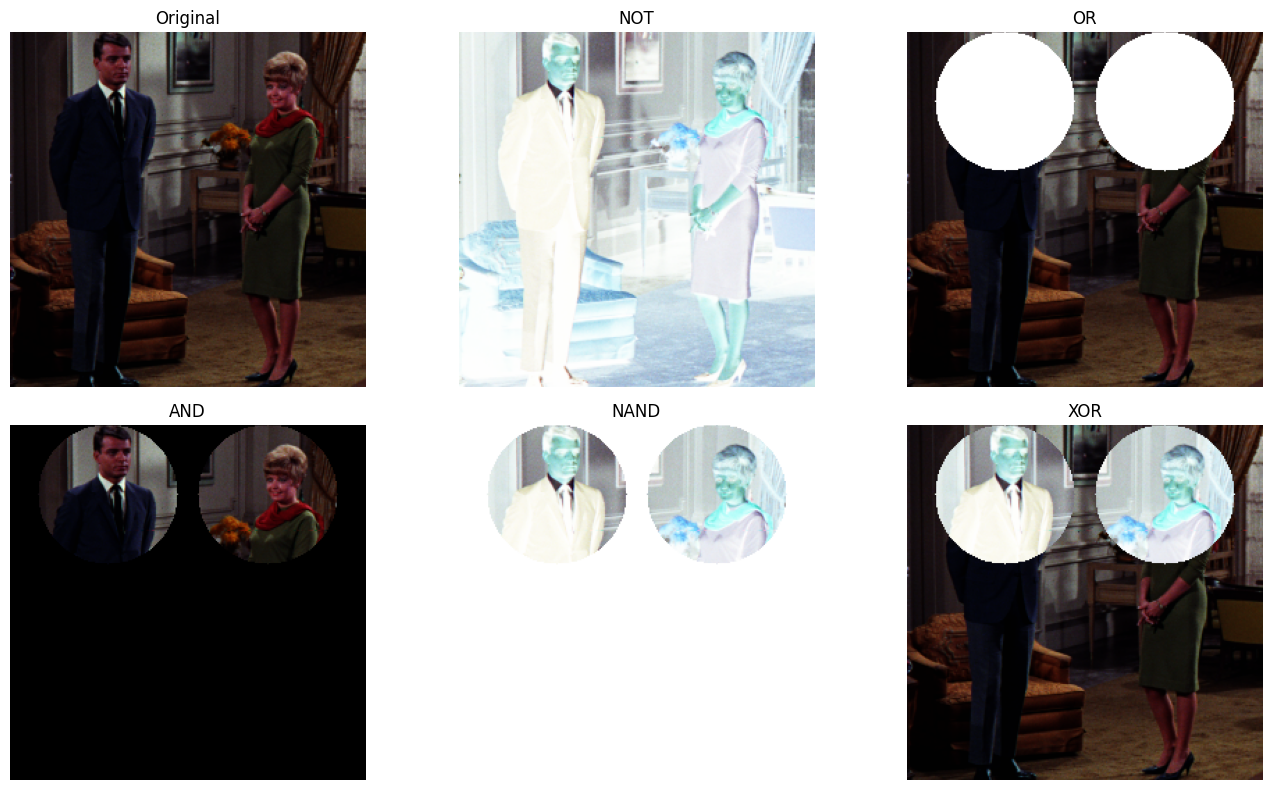

In [30]:
source_image = cv.imread('Images/Couple.bmp')

cv.circle(mask_layer, (70, 50), 50, (255, 255, 255), thickness=-1)
cv.circle(mask_layer, (185, 50), 50, (255, 255, 255), thickness=-1)

not_operation = cv.bitwise_not(source_image)
or_operation = cv.bitwise_or(source_image, mask_layer)
and_operation = cv.bitwise_and(source_image, mask_layer)
nand_operation = cv.bitwise_not(and_operation)
xor_operation = cv.bitwise_xor(source_image, mask_layer)

def display_grid(images, labels):
    total = len(images)
    plt.figure(figsize=(14, 8))
    for i in range(total):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

image_list = [source_image, not_operation, or_operation, and_operation, nand_operation, xor_operation]
image_labels = ['Original', 'NOT', 'OR', 'AND', 'NAND', 'XOR']

display_grid(image_list, image_labels)

